<a href="https://colab.research.google.com/github/LavyaS/skill-new/blob/main/BMLLCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BML LCA


Data Loaded: (1599, 12)


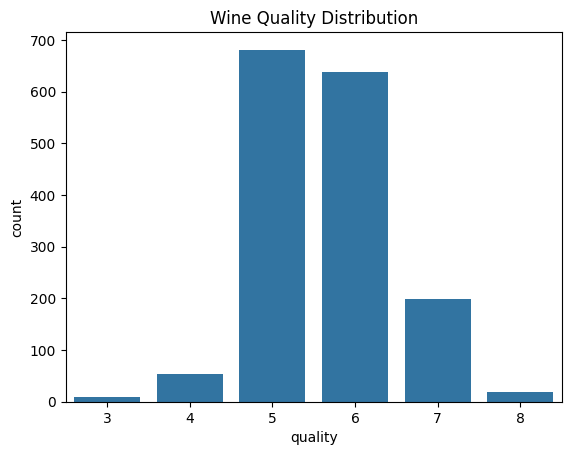

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/red_wine.csv')
print(f"Data Loaded: {data.shape}")

# Visualize 'quality' distribution
sns.countplot(x='quality', data=data)
plt.title("Wine Quality Distribution")
plt.show()



Feature Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Target Unique Values: [5 6 7 4 8 3]


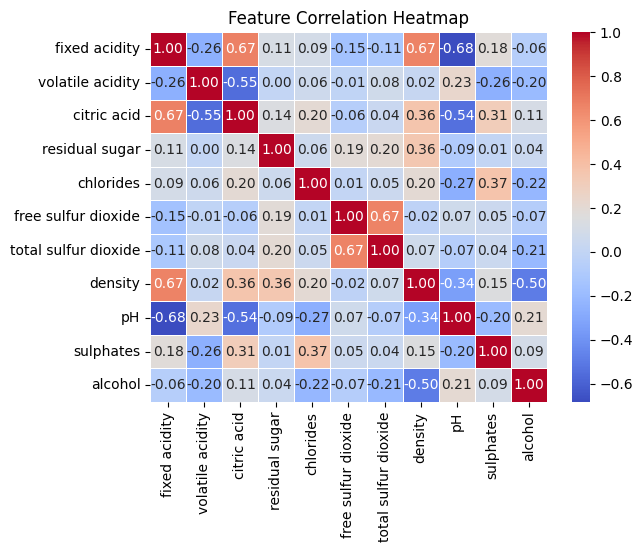

In [ ]:
# Data Preprocessing
X = data.drop('quality', axis=1)
y = data['quality']
print(f"Feature Columns: {X.columns.tolist()}")
print(f"Target Unique Values: {y.unique()}")

# Correlation heatmap
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()




In [ ]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")




Training set size: (1279, 11), Test set size: (320, 11)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Convert target to integer classes
y_train = y_train.round().astype(int)

# Train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter options
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# RandomizedSearchCV
rand_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10, cv=5, random_state=42, n_jobs=-1
)

# Fit and display best model
rand_search.fit(X_train, y_train)
best_dt_model = rand_search.best_estimator_
print(f"Best Hyperparameters: {rand_search.best_params_}")


Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}


Test Accuracy: 0.6562


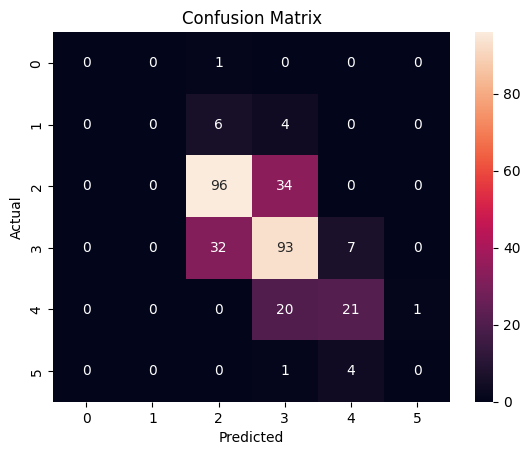

In [ ]:
# Step 5: Easy Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict and print accuracy
y_pred = best_rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Simple confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
